#Data Loading and Initial Inspection

In [47]:
import pandas as pd

# Load dataset
df = pd.read_csv('online_retail.csv')

# Basic info
print(df.shape)
print(df.info())
print(df.describe())

(541909, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB
None
              index       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  406829.000000
mean   270954.00000       9.552250       4.611114   15287.690570
std    156435.79785     218.081158      96.759853    1713.600303
min         0.00000  -80995.000000  -11062.060000   12346.000000
25%    13547

#Data Cleaning

In [48]:
# Option 1: Drop rows with missing descriptions
#df = df.dropna(subset=['Description'])

# Option 2: Fill missing descriptions with a placeholder
df['Description'] = df['Description'].fillna('Unknown')

In [49]:
# Option 1: Drop rows with missing CustomerID for customer-specific analysis
#df_customer = df.dropna(subset=['CustomerID'])

# Option 2: Fill missing CustomerID with 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [50]:
# Convert InvoiceDate to datetime, specifying the correct format
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
# or format='%m/%d/%Y %H:%M', errors='coerce' if Month/Day/Year

# errors='coerce' handles rows with unparsable dates by setting them to NaT (Not a Time)

In [51]:
import pandas as pd
from dateutil import parser

# Function to parse dates flexibly
def parse_dates(date_str):
    try:
        return parser.parse(date_str)  # Automatically detects format
    except Exception:
        return pd.NaT  # Returns NaT if parsing fails

# Apply the function to the InvoiceDate column
df['InvoiceDate'] = df['InvoiceDate'].apply(parse_dates)

In [52]:
# Check remaining NaT values in InvoiceDate
print(f"Remaining NaT values: {df['InvoiceDate'].isna().sum()}")

Remaining NaT values: 0


In [53]:
# Sample some dates to verify parsing
print(df[['InvoiceNo', 'InvoiceDate']].head(10))
print(df['InvoiceDate'].min(), df['InvoiceDate'].max())

  InvoiceNo         InvoiceDate
0    536365 2010-12-01 08:26:00
1    536365 2010-12-01 08:26:00
2    536365 2010-12-01 08:26:00
3    536365 2010-12-01 08:26:00
4    536365 2010-12-01 08:26:00
5    536365 2010-12-01 08:26:00
6    536365 2010-12-01 08:26:00
7    536366 2010-12-01 08:28:00
8    536366 2010-12-01 08:28:00
9    536367 2010-12-01 08:34:00
2010-12-01 08:26:00 2011-12-09 12:50:00


In [54]:
# Option 1: Filter out negative quantities (if irrelevant)
#df = df[df['Quantity'] > 0]

# Option 2: Create a separate dataset for returns
df_returns = df[df['Quantity'] < 0]

In [55]:
# Remove rows with UnitPrice <= 0
df = df[df['UnitPrice'] > 0]

In [56]:
# Drop duplicates
df = df.drop_duplicates()

In [57]:
# Check for inconsistencies
inconsistent_invoices = df[df['InvoiceDate'].isna() | df['InvoiceNo'].isna()]
print(inconsistent_invoices)

Empty DataFrame
Columns: [index, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


#Data Validation

In [58]:
# Summary statistics for numerical columns
print(df.describe())

# Count non-null values in each column
print(df.info())

# Check unique Invoice numbers
print(f"Unique Invoices: {df['InvoiceNo'].nunique()}")

               index       Quantity                    InvoiceDate  \
count  539392.000000  539392.000000                         539392   
mean   271133.366188       9.845904  2011-07-04 16:40:36.232350208   
min         0.000000  -80995.000000            2010-12-01 08:26:00   
25%    135559.750000       1.000000            2011-03-28 11:59:00   
50%    271261.500000       3.000000            2011-07-20 11:50:00   
75%    406638.250000      10.000000            2011-10-19 11:49:00   
max    541908.000000   80995.000000            2011-12-09 12:50:00   
std    156460.483033     215.412652                            NaN   

           UnitPrice  
count  539392.000000  
mean        4.673648  
min         0.001000  
25%         1.250000  
50%         2.080000  
75%         4.130000  
max     38970.000000  
std        94.614722  
<class 'pandas.core.frame.DataFrame'>
Index: 539392 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  --

In [59]:
# Check extreme values in Quantity
extreme_quantities = df[(df['Quantity'] < -1000) | (df['Quantity'] > 1000)]
print(extreme_quantities[['InvoiceNo', 'Quantity', 'Description']].head(10))

      InvoiceNo  Quantity                          Description
4287    C536757     -9360  ROTATING SILVER ANGELS T-LIGHT HLDR
4850     536809      1824       ASSORTED COLOUR T-LIGHT HOLDER
4945     536830      2880    WORLD WAR 2 GLIDERS ASSTD DESIGNS
4946     536830      1400               RED  HARMONICA IN BOX 
6365     536890      1440                ASSORTED INCENSE PACK
16435    537659      1008              CREAM HEART CARD HOLDER
16436    537659      1008              BLACK HEART CARD HOLDER
19871    537899      1488   ROUND SNACK BOXES SET OF 4 FRUITS 
19980    537981      1394              MINI PAINT SET VINTAGE 
25920    538420      1728    ASSORTED LAQUERED INCENSE HOLDERS


In [60]:
# Check extreme UnitPrice values
extreme_prices = df[(df['UnitPrice'] > 1000) | (df['UnitPrice'] < 0.1)]
print(extreme_prices[['InvoiceNo', 'UnitPrice', 'Description']].head(10))

      InvoiceNo  UnitPrice                          Description
4287    C536757       0.03  ROTATING SILVER ANGELS T-LIGHT HLDR
14788    537618       0.07       PORCELAIN BUDAH INCENSE HOLDER
15016   C537630   13541.33                           AMAZON FEE
15017    537632   13541.33                           AMAZON FEE
16232   C537644   13474.79                           AMAZON FEE
16313   C537647    5519.25                           AMAZON FEE
16356   C537651   13541.33                           AMAZON FEE
16357   C537652    6706.71                           AMAZON FEE
28994   C538682    1130.90                               Manual
41448    539856    1298.40                               Manual


#Data Analysis

#Data Visualization

Sales Trends Over Time

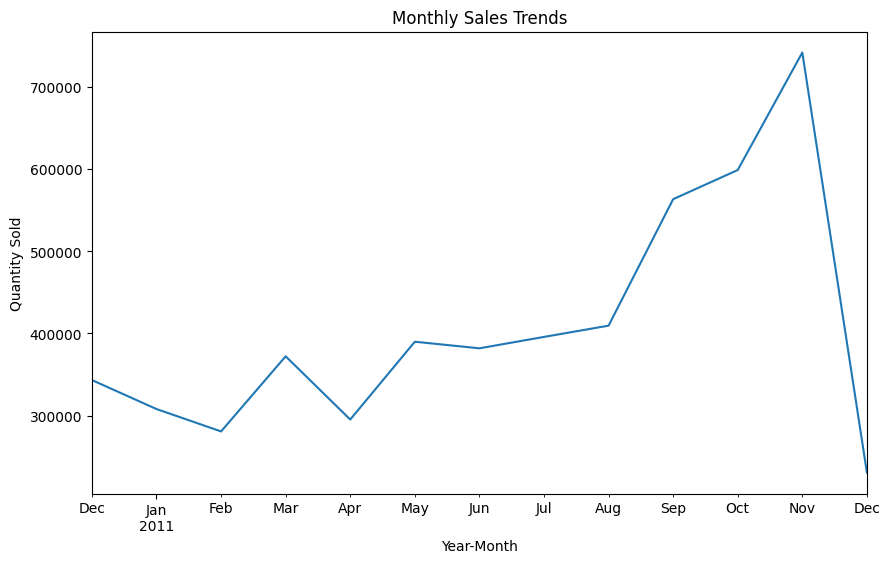

In [63]:
# Extract year and month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate monthly sales
monthly_sales = df.groupby('YearMonth')['Quantity'].sum()

# Plot monthly sales
import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', title='Monthly Sales Trends', xlabel='Year-Month', ylabel='Quantity Sold', figsize=(10, 6))
plt.show()

Time Series Plots for Sales Trends

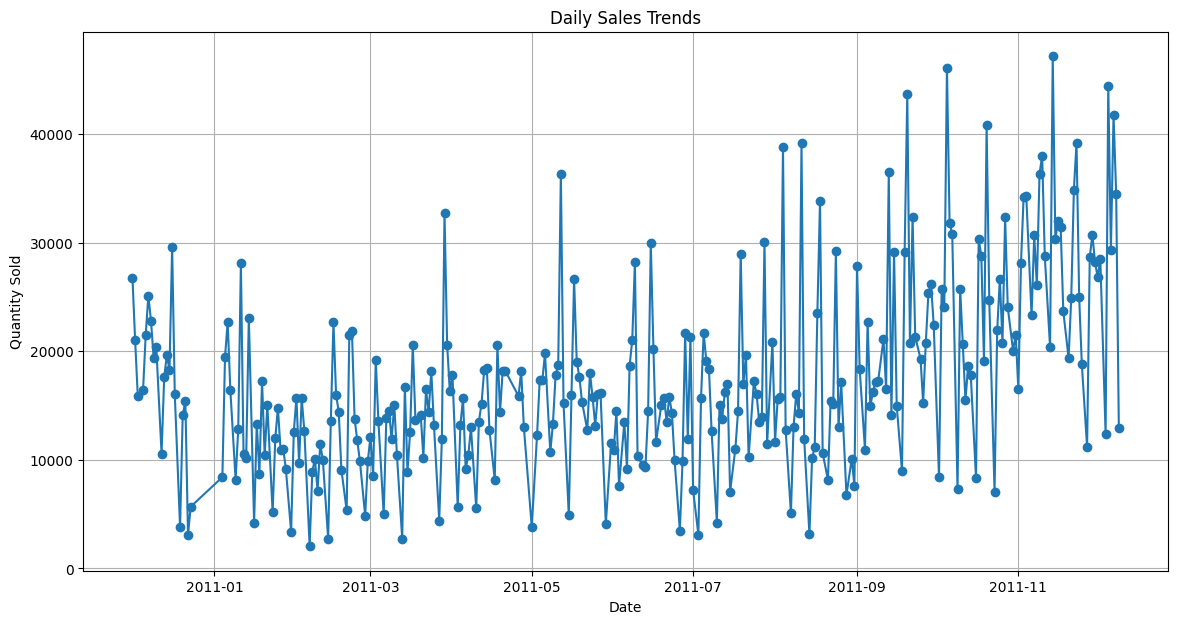

In [65]:
# Aggregate data by date, excluding the 'InvoiceDate' column from the sum operation
sales_trend = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum() # Only sum 'Quantity'

# Plotting sales trends
plt.figure(figsize=(14, 7))
plt.plot(sales_trend.index, sales_trend.values, marker='o') # Access values for plotting
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

Bar Charts for Product/Category Performance

<ipython-input-72-93ad800788ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales['Quantity'], y=product_sales.index, palette='viridis') # Now sns is defined


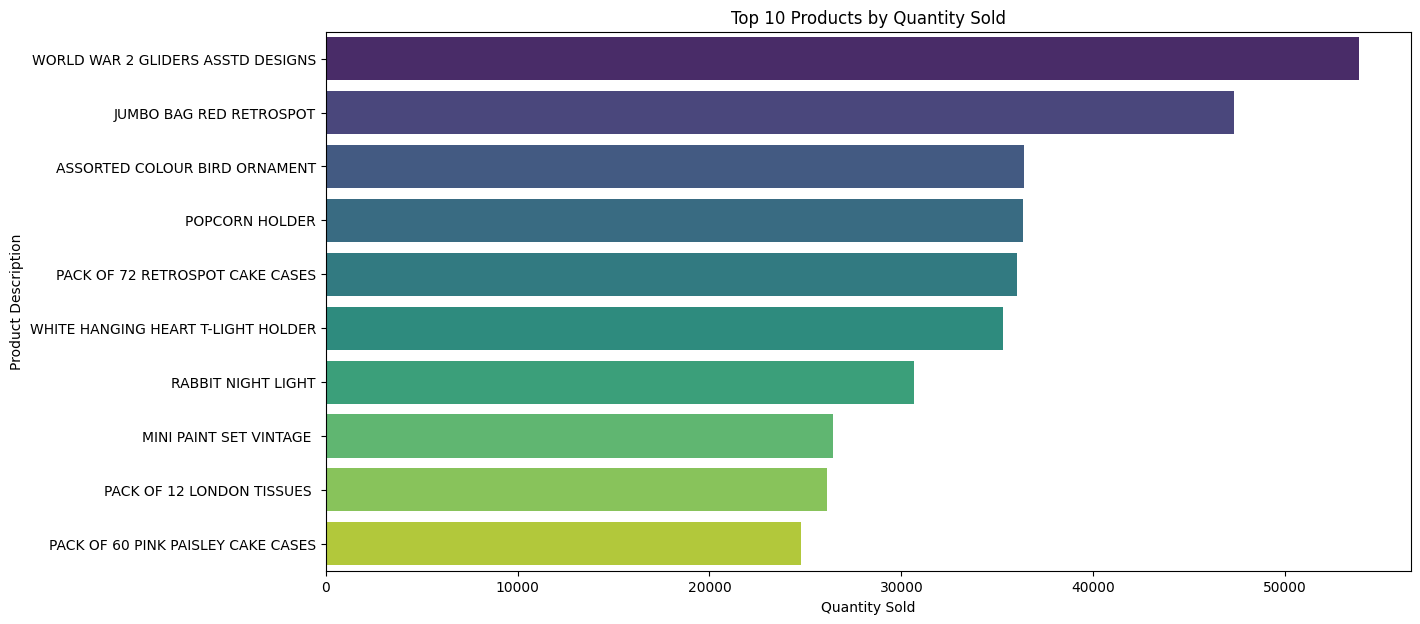

In [72]:
# Import seaborn
import seaborn as sns

# Aggregating sales by product, selecting only numerical columns for sum
product_sales = df.groupby('Description')[['Quantity', 'TotalRevenue']].sum().sort_values(by='Quantity', ascending=False).head(10)

# Plotting top products
plt.figure(figsize=(14, 7))
sns.barplot(x=product_sales['Quantity'], y=product_sales.index, palette='viridis') # Now sns is defined
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

Heatmaps for Correlation Analysis

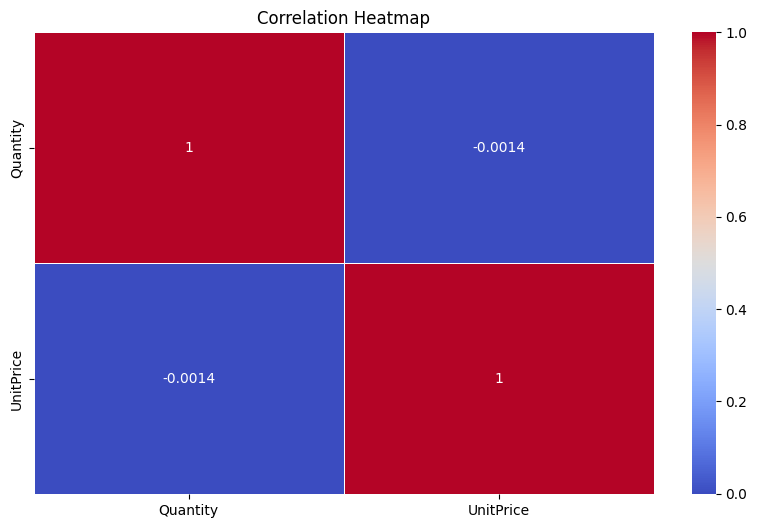

In [73]:
# Correlation matrix
correlation = df[['Quantity', 'UnitPrice']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Regional Sales Analysis


Country
United Kingdom          8209930.484
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

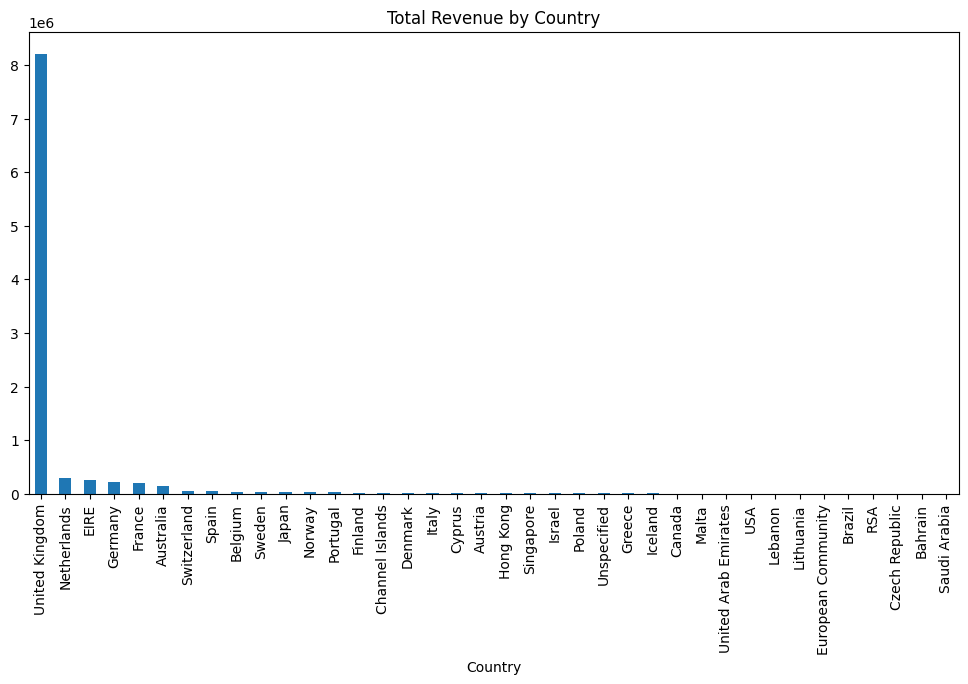

In [77]:
# Sales by country
sales_by_country = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
print(sales_by_country)

# Visualize country sales
sales_by_country.plot(kind='bar', title='Total Revenue by Country', figsize=(12, 6))
plt.show()

#Reporting & Insights

Top-Performing Products and Regions

In [76]:
# Calculate total revenue per product
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
top_products = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False)
print('Top 10 Products:\n',top_products.head(10))

Top 10 Products:
 Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalRevenue, dtype: float64


In [79]:
#Top performing countries
top_countries = sales_by_country.head(5)
print('Top 5 countries:\n',top_countries)

Top 5 countries:
 Country
United Kingdom    8209930.484
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalRevenue, dtype: float64


Revenue Trends by Month/Year

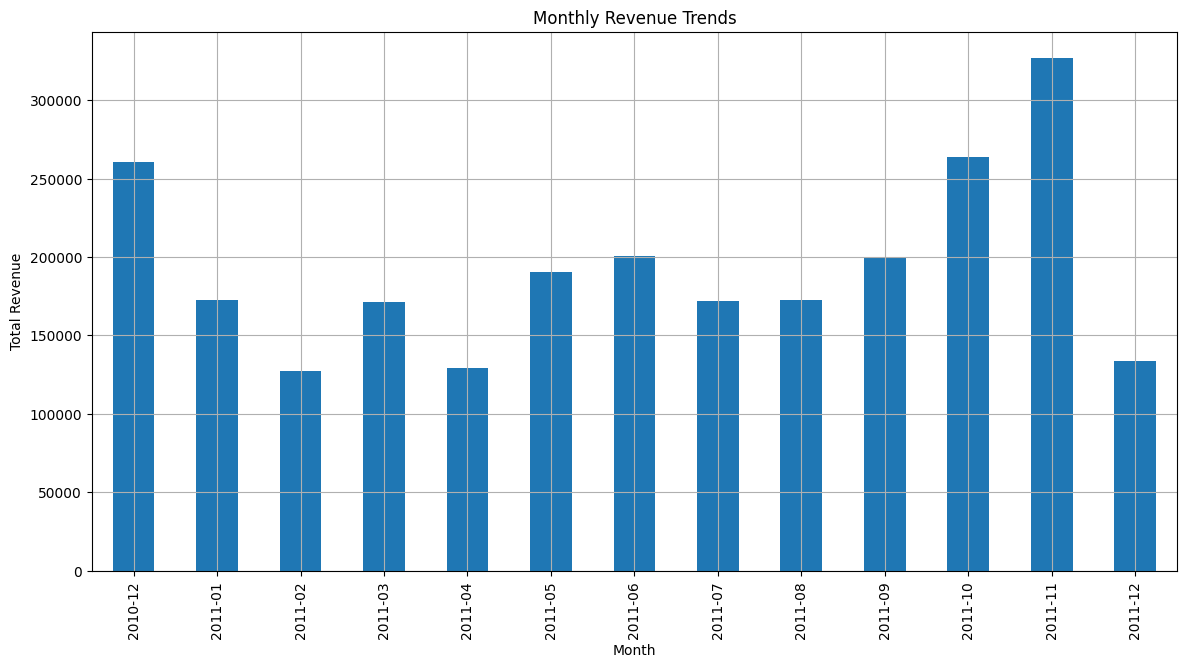

In [81]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
# Group by 'YearMonth' and sum only the 'UnitPrice' column
revenue_trend = df.groupby('YearMonth')['UnitPrice'].sum()

plt.figure(figsize=(14, 7))
revenue_trend.plot(kind='bar')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Customer Segmentation

In [38]:
# Total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)
print(customer_revenue.head(10))

CustomerID
Unknown    1469806.24
14646.0     279489.02
18102.0     256438.49
17450.0     187482.17
14911.0     132572.62
12415.0     123725.45
14156.0     113384.14
17511.0      88125.38
16684.0      65892.08
13694.0      62653.10
Name: TotalRevenue, dtype: float64


Returns Analysis

In [39]:
# Return rate per product
return_rate = df_returns.groupby('Description')['Quantity'].sum().sort_values()
print(return_rate.head(10))

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
Unknown                               -46156
printing smudges/thrown away          -19200
Unsaleable, destroyed.                -15644
check                                 -13247
?                                      -9496
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Printing smudges/thrown away           -9058
Damaged                                -7540
Name: Quantity, dtype: int64
